# Data Visulization on 'Life Expectancy [WHO] Dataset'

|Particulars|Value|
|-|-|
|Name|Ms.Neerja Doshi|
|UID|2021300029|
|Div|BE COMPS [ ADV -> BATCH F ]|
|ADV EXPT 2|


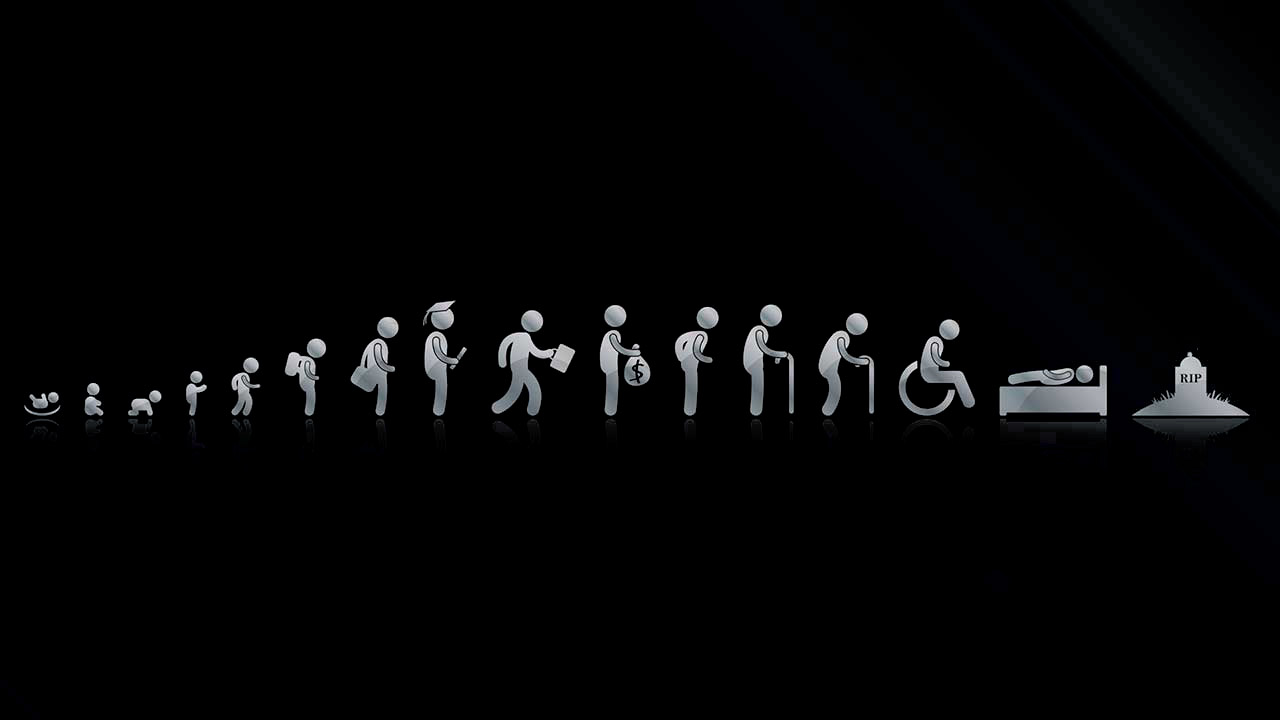

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

# for non-linear regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [ ]:
# importing dataset

file_path =  '/content/Life Expectancy Data.csv'
df = pd.read_csv(file_path)
df.head()

In [ ]:
df.describe()

## Correlation Matrix

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float', 'int'])
corr_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.show()


## WordCloud

In [ ]:
text = ' '.join(df['Status'].astype(str).tolist() +
               df['Year'].astype(str).tolist() +
               df['Country'].tolist() +
               df['Life expectancy '].astype(str).tolist())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
# interpolation='bilinear' for normalising pixels for display
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

1. As seen aboev the highest word count is seen of "Developing" followed by "Developed" Countries.

2. This suggests that uptil 2015 , the count if developing countries was highest.

## Box Plot

1) Life Expectancy per Year

2) Status vs Percentage expenditure

3) Status vs Life Expectancy

In [ ]:
sns.boxplot(x='Year', y='Life expectancy ', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Life Expectancy per Year')
plt.ylabel('Life Expectancy')
plt.xlabel('Year')
plt.show()


In [ ]:
sns.boxplot(x='Status', y='percentage expenditure', data=df)
plt.title('Percenatage Expenditute of Developing and Developed Countries')
plt.ylabel('percentage expenditure')
plt.xlabel('Status')
plt.show()

In [ ]:
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.title('Life Expectancy of Developing and Developed Countries')
plt.ylabel('Life Expectancy')
plt.xlabel('Status')
plt.show()

1. The median life expectancy has been almost constant throughout thr years .

2. Same goes with 75% percentile line.

3. Post 2003 , there has been a increase in the min and max value of Life Expectancy . The second box plots gives an answer to this .. as there has been and increas in Percentage expenditure seen as well owing to high quality of life.

4. Devloped nations spend more and hence have higher life expectancies contrary to deveolping nations.

## Violin Plot

1) Life Expectancy per Year

2) Status vs Percentage expenditure

3) Status vs Life Expectancy

In [ ]:
sns.violinplot(x='Year', y='Life expectancy ', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Life Expectancy Distribution per Year')
plt.ylabel('Life Expectancy')
plt.xlabel('Year')
plt.show()


In [ ]:
sns.violinplot(x='Status', y='percentage expenditure', data=df)
plt.title('Percenatage Expenditute of Developing and Developed Countries')
plt.ylabel('percentage expenditure')
plt.xlabel('Status')
plt.show()

In [ ]:
sns.violinplot(x='Status', y='Life expectancy ', data=df)
plt.title('Life Expectancy of Developing and Developed Countries')
plt.ylabel('Life Expectancy')
plt.xlabel('Status')
plt.show()

1. The median life expectancies is concentrated around 72 yrs.

2. Majority of the developing nations spend nil amount

3. Even though developed nations spend more , there is only a slight increase in median life expectancies.

## Regression Lines

1) Country wise Life Expectancy -> Linear

2) Life Expectancy on Total Expenditure and Alcohol ->  Nonlinear

In [ ]:
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,title='<b> Country wise Life Expectancy over Years')
fig.update_yaxes(range=[0, 100])
fig.show()

In [ ]:
# x , y values
X = df[['Total expenditure']]
y = df['Life expectancy ']

# data cleaning ->
# removing Nan in Alcohol and Total expenditure
# removing Nan in Life expectancy

X = X.fillna(X.mean())
y = y.fillna(y.mean())

# polynomial regression model with degree 2
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

y_pred = model.predict(X)

# visialization
fig = plt.figure()
plt.scatter(X['Total expenditure'], y, color='blue')
plt.scatter(X['Total expenditure'], y_pred, color='red')

plt.xlabel('Total expenditure')
plt.ylabel('Life expectancy')
plt.title('Non-Linear Regression (Polynomial)')
plt.show()

## 3D Plot

Dependent Variable : Life Expectancy
Independent Variables : Alcohol and Total expenditure

In [ ]:
# x , y values
X = df[['Alcohol', 'Total expenditure']]
y = df['Life expectancy ']

# data cleaning ->
# removing Nan in Alcohol and Total expenditure
# removing Nan in Life expectancy

X = X.fillna(X.mean())
y = y.fillna(y.mean())

# polynomial regression model with degree 2
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

y_pred = model.predict(X)

# df for 3d plot
plot_df = pd.DataFrame({
    'Alcohol': X['Alcohol'],
    'Total expenditure': X['Total expenditure'],
    'Life expectancy (Actual)': y,
    'Life expectancy (Predicted)': y_pred
})

# visialization
fig = px.scatter_3d(plot_df, x='Alcohol', y='Total expenditure', z='Life expectancy (Actual)',
                    color='Life expectancy (Predicted)',
                    title='Non-Linear Regression (Polynomial)')
fig.show()

## Jitter Plot

|Sr. No.|Scatter Plot|Jitter PLot|
|-|-|-|
|1|overalapping data is seen|To reduce Overlapping .. a little jitter ( offset) is added|


In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Scatter plot
sns.scatterplot(x='percentage expenditure', y='GDP', hue = 'Status', data=df, ax=axes[0])
axes[0].set_title('Scatter Plot')
axes[0].set_xlabel('percentage expenditure')
axes[0].set_ylabel('GDP')

# Jitter plot
sns.stripplot(x='percentage expenditure', y='GDP', hue = 'Status',  data=df, jitter=True, ax=axes[1])
axes[1].set_title('Jitter Plot')
axes[1].set_xlabel('percentage expenditure')
axes[1].set_ylabel('GDP')

plt.tight_layout()
plt.show()

1. As seen in the correlation matrix , percentage expenditure and GDP have a direct correlation

2. On Plotting both of them we understand that because of this direct relation , there is a Linear plot which is seen.

3. For many developing nations, spending more is not increasing the GDP alot

4. Developed nations have high GDP coz of their high expenditure.